In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/8 Semestre/Bloque 2/M2_IA/archive/tom_and_jerry"
!ls

/content/drive/MyDrive/8 Semestre/Bloque 2/M2_IA/archive/tom_and_jerry
tom_and_jerry_preprocessed  tom_and_jerry_raw


In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import random
import pandas as pd
import cv2
import glob
import csv
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
#import squarify
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras import mixed_precision

In [ ]:

raw_images_dir = 'tom_and_jerry_raw'

class_names = ['tom_jerry_1', 'jerry', 'tom', 'tom_jerry_0']

colors = ['#393E46', '#FFD369', '#36D1DC', '#EEEEEE']


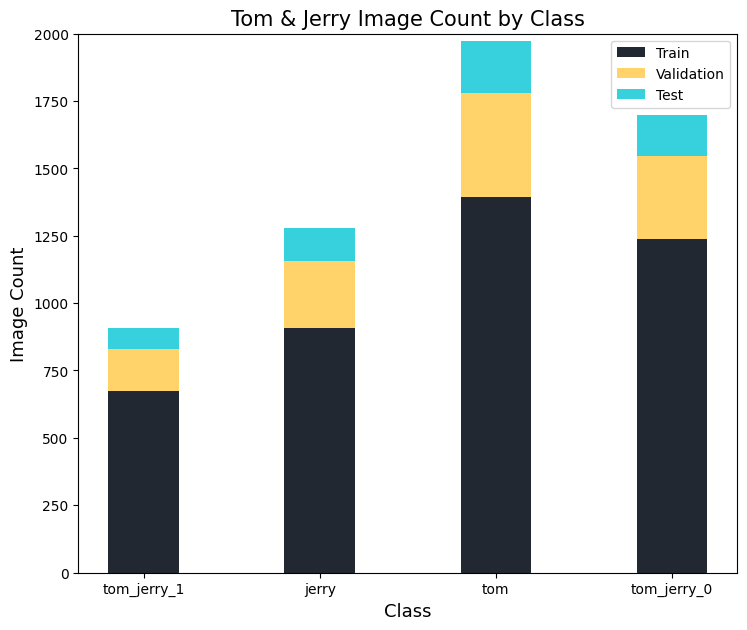

In [ ]:
pre_images_dir = 'tom_and_jerry_preprocessed'

train_image_counts = [len(os.listdir(os.path.join(pre_images_dir, "train", class_name))) for class_name in class_names]
val_image_counts = [len(os.listdir(os.path.join(pre_images_dir, "val", class_name))) for class_name in class_names]
test_image_counts = [len(os.listdir(os.path.join(pre_images_dir, "test", class_name))) for class_name in class_names]

train_image_counts = np.array(train_image_counts)
val_image_counts = np.array(val_image_counts)
test_image_counts = np.array(test_image_counts)

fig, ax = plt.subplots(figsize = (8.5, 7))

ax.bar(class_names, train_image_counts, width = 0.4, label = "Train", color = "#222831")
ax.bar(class_names, val_image_counts, width = 0.4, label = "Validation", bottom = train_image_counts, color = "#FFD369")
ax.bar(class_names, test_image_counts, width = 0.4, label = "Test", bottom = train_image_counts + val_image_counts, color="#36D1DC")

ax.set_ylim(0, 2000)
plt.ylabel("Image Count", fontsize = 13)
plt.xlabel("Class", fontsize = 13)
plt.title("Tom & Jerry Image Count by Class", fontsize = 15)
ax.legend();

# Preprocesado

In [ ]:
base_dir = 'tom_and_jerry_preprocessed'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    # width_shift_range = 0.2,
		#	height_shift_range = 0.2,
		#	shear_range = 0.3,
		#	zoom_range = 0.3,
    horizontal_flip = True,
    #fill_mode = 'nearest',
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical',
    subset = 'validation',  # Especificar que este es el conjunto de validación
    shuffle = True
)


Found 4494 images belonging to 4 classes.
Found 1122 images belonging to 4 classes.


<Figure size 640x480 with 0 Axes>

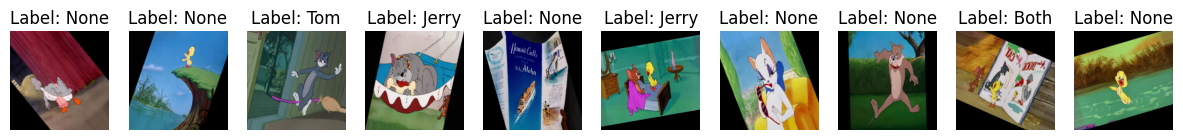

In [ ]:
label_categories = {
    0: "Jerry",
    1: "Tom",
    2: "None",
    3: "Both"
}

images , labels = train_generator[0]
num_imgs = min(images.shape[0], 10)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, num_imgs, figsize=(15, 5))

for i in range(num_imgs) :
  axarr[i].imshow(images[i])
  label_index = labels[i].argmax()
  axarr[i].title.set_text(f"Label: {label_categories[label_index]}")
  axarr[i].axis('off')